In [4]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

from dataset import TimeSeriesDataset
from models import LinearRegression

train_ds = TimeSeriesDataset('sample_data.csv', ['u', 'v', 'w'], 100, train=True)
test_ds =  TimeSeriesDataset('sample_data.csv', ['u', 'v', 'w'], 100, train=False)

train_loader = DataLoader(train_ds, batch_size = 64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle=True)

my_model = LinearRegression(3, 100)

In [17]:
print(my_model.state_dict())

OrderedDict([('linears.0.weight', tensor([[-0.0284, -0.0095,  0.0071,  0.0839,  0.0046, -0.0751, -0.0900,  0.0555,
          0.0653, -0.0271,  0.0617, -0.0135,  0.0310, -0.0279, -0.0197, -0.0506,
         -0.0114, -0.0300, -0.0350,  0.0953,  0.0667,  0.0929, -0.0102, -0.0951,
          0.0900, -0.0013, -0.0047,  0.0964, -0.0404, -0.0193, -0.0350, -0.0537,
          0.0274,  0.0247,  0.0102,  0.0600,  0.0838, -0.0194,  0.0259, -0.0518,
          0.0074, -0.0159, -0.0483, -0.0265,  0.0014, -0.0275, -0.0139, -0.0437,
         -0.0955, -0.0450,  0.0312, -0.0657, -0.0228, -0.0312, -0.0996, -0.0982,
         -0.0065, -0.0109,  0.0611,  0.0664,  0.0574, -0.0849,  0.0164,  0.0307,
         -0.0780, -0.0286,  0.0654, -0.0642,  0.0061,  0.0897,  0.0300, -0.0590,
         -0.0392,  0.0945, -0.0321, -0.0813,  0.0883, -0.0747, -0.0879,  0.0528,
         -0.0917, -0.0098, -0.0916,  0.0642,  0.0760, -0.0259,  0.0986, -0.0956,
          0.0048, -0.0640, -0.0563, -0.0325,  0.0051,  0.0662,  0.0485, -0.

In [18]:
for batch_X, batch_y in train_loader:
    bx = batch_X
    by = batch_y
    break

In [12]:
print(bx[0][:, 0])

tensor([1.7283, 1.4780, 1.6540, 2.0312, 1.7271, 0.9262, 1.1574, 1.3773, 1.3235,
        1.5379, 1.3501, 1.1664, 1.4738, 1.2526, 1.0037, 1.0259, 1.2447, 1.1924,
        0.9953, 0.9637, 0.8132, 1.1131, 0.9846, 1.0603, 1.9947, 1.9497, 1.4320,
        1.6947, 1.3894, 1.5830, 2.7933, 1.8742, 1.9676, 2.0616, 2.0504, 1.5969,
        1.0849, 1.0005, 1.1345, 0.9578, 0.9490, 0.9711, 0.8734, 1.2162, 1.5980,
        1.6798, 1.5184, 1.4469, 1.3372, 0.6596, 0.7807, 1.0808, 1.7227, 2.0995,
        2.0274, 1.9515, 1.7765, 1.8446, 2.1954, 1.9088, 1.8762, 1.5251, 2.1092,
        2.0529, 2.2489, 2.2339, 2.0587, 1.7268, 2.2888, 2.7055, 2.7768, 3.0430,
        2.3521, 2.7568, 2.9375, 2.8577, 2.7145, 2.5915, 2.4646, 2.3922, 2.6572,
        2.4859, 2.3395, 2.1781, 2.4575, 2.2461, 2.0190, 1.6125, 1.8521, 2.1008,
        1.9497, 1.9941, 1.8720, 1.8433, 1.9231, 1.9066, 1.8852, 1.6118, 2.3075,
        1.9777])


In [38]:
print(my_model(bx).shape)

torch.Size([64, 3])


In [39]:
print(by.shape)

torch.Size([64, 3])


In [49]:
from models import LinearRegressionFlat
model_flat = LinearRegressionFlat(3, 100)

In [46]:
bx.shape

torch.Size([64, 100, 3])

In [50]:
model_flat(bx).shape

torch.Size([64, 3])

In [52]:
my_model(bx).shape

torch.Size([64, 3])

In [23]:
lin =nn.Linear(100, 1)

In [33]:
print(batch_X[:, :, 0].shape)

torch.Size([64, 100])


In [35]:
print(lin(batch_X[:, :, 0]).shape)

torch.Size([64, 1])


In [2]:
from dataset import TimeSeriesDataset

In [13]:
ds = TimeSeriesDataset('sample_data.csv', ['u', 'v', 'w'], 100)

In [16]:
print(ds.__getitem__(10))

(tensor([[ 5.9242e-04, -5.7671e-01, -4.5325e-01],
        [-8.9973e-02, -5.3263e-01, -5.9750e-02],
        [ 3.0763e-02, -3.8537e-01, -3.2500e-03],
        [ 5.4935e-01, -6.8628e-01, -1.3750e-01],
        [ 8.6002e-01, -1.1658e+00,  5.5000e-02],
        [ 7.5903e-01, -9.6405e-01, -5.7900e-01],
        [ 1.3851e-01, -7.6313e-01, -2.7900e-01],
        [-4.7151e-01, -6.3400e-01, -5.3150e-01],
        [-6.4079e-02, -1.0176e+00, -5.7475e-01],
        [-1.4970e-01, -1.0096e+00, -4.2950e-01],
        [ 4.9080e-02, -9.7745e-01, -3.1250e-01],
        [ 1.7079e-01, -1.0419e+00, -4.0250e-01],
        [ 1.9497e-01, -9.3539e-01, -3.2925e-01],
        [ 2.0501e-01, -9.1630e-01, -2.3600e-01],
        [ 4.2235e-01, -8.8119e-01, -3.4475e-01],
        [ 2.4722e-01, -7.1722e-01, -3.3250e-01],
        [ 6.1128e-01, -3.8704e-01, -6.5975e-01],
        [ 6.3063e-01, -2.5508e-01, -5.1750e-01],
        [ 9.2356e-01, -6.1656e-01,  4.4900e-01],
        [ 5.8931e-01, -1.3399e+00,  6.2250e-02],
        [ 1.6790e-0

In [21]:
for batch_X, batch_y in dl:
    print(batch_X.shape)
    print(batch_y.shape)
    break

torch.Size([64, 100, 3])
torch.Size([64, 3])


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

In [3]:
train_ds = TimeSeriesDataset('sample_data.csv', ['u', 'v', 'w'], 100, train=True)
test_ds =  TimeSeriesDataset('sample_data.csv', ['u', 'v', 'w'], 100, train=False)

In [4]:
print(len(train_ds))

393432


In [5]:
print(len(test_ds))

98357


In [7]:
train_loader = DataLoader(train_ds, batch_size = 64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle=True)

In [8]:
for batch_x, batch_y in train_loader:
    print(batch_x.shape, batch_y.shape)
    break

torch.Size([64, 100, 3]) torch.Size([64, 3])


In [18]:
dl = DataLoader(ds, batch_size=64, shuffle=TrueDataLoader(train_dataset, batch_size=64, shuffle=True))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_name = 

In [3]:
import scipy.io
mat = scipy.io.loadmat('csat_data_5_27_2022.mat')

/home/dylaneg/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [4]:
print(np.array(mat['None']))

[(b'time', b'MCOS', b'datetime', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         4],
        [         1]], dtype=uint32))                ]


In [8]:
u_vals = mat['u'][:, 0]
v_vals = mat['v'][:, 0]
w_vals = mat['w'][:, 0]

In [9]:
print(u_vals)

[ 0.3799339   0.15147042 -0.19240183 ...  2.88711187  3.57278081
  2.1278631 ]


In [10]:
dct = {'u': u_vals, 'v': v_vals, 'w': w_vals}

In [12]:
pd.DataFrame.from_dict(dct).to_csv('sample_data.csv', index=False)

In [6]:
print(len(u_vals))

491890


In [29]:
print(np.fft(u_vals))

TypeError: 'module' object is not callable

In [6]:
# Define the logistic regression model
class LinearRegression(nn.Module):

    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return (self.linear(x))
    
    def custom_loss(self, y_pred, y_true):
        return torch.mean(torch.square(y_pred - y_true))

In [12]:
u_mean = (np.mean(u_vals))
u_std = (np.std(u_vals))

In [13]:
u_vals = u_vals[:, 0]

In [14]:
u_vals_normed = (u_vals - u_mean)/u_std

In [15]:
frac = 0.8
train_u = u_vals_normed[:int(frac * len(u_vals_normed))]
test_u = u_vals_normed[int(frac * len(u_vals_normed)):]

In [12]:
print(train_u)

[-0.58972238 -0.72152728 -0.91991368 ...  0.3599549  -0.08010303
  0.19220368]


In [57]:
print(list(train_u[1:6]))

[-0.721527281882787, -0.9199136779748445, -0.7502415878507295, -0.7566893073506548, -0.8241668056877361]


In [13]:
print(list(train_u[5]))

TypeError: 'numpy.float64' object is not iterable

In [16]:
sample_len = 100
X_train = []
y_train = []
for i in range(len(train_u) - sample_len):
    try:
        X_train.append(list(train_u[i:i+sample_len]))
        y_train.append(train_u[i+sample_len])
    except:
        break

X_test = []
y_test = []
for i in range(len(test_u) - sample_len):
    try:
        X_test.append(list(test_u[i:i+sample_len]))
        y_test.append(test_u[i+sample_len])
    except:
        break

In [17]:
X_train = np.array(X_train)

In [18]:
y_train = np.array(y_train)

In [19]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [20]:
X_test = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.float32)

In [21]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [22]:
model = LinearRegression(sample_len)

In [145]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [24]:
y_pred = model(X_test)

In [80]:
print(y_pred.shape)

torch.Size([98278, 1])


In [25]:
y_test = (y_test.reshape((98278, 1)))

In [26]:
print(torch.sqrt(torch.mean(torch.square(y_pred - y_test))))

tensor(1.0180, grad_fn=<SqrtBackward0>)


In [82]:
print(torch.sqrt(torch.mean(torch.square(y_pred - y_test))))

tensor(1.1958, grad_fn=<SqrtBackward0>)


In [114]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100]])), ('linear.bias', tensor([0.]))])


In [112]:
set_weights(model, weights)

In [116]:
bx = 0
by = 0
for batch_X, batch_y in train_loader:
    bx = batch_X
    by = batch_y

In [118]:
print(bx.shape)

torch.Size([4, 100])


In [119]:
print(by.shape)

torch.Size([4])


In [122]:
bpred = (model(bx))

In [124]:
print(bpred)

tensor([[-0.3191],
        [ 0.2880],
        [ 0.1688],
        [-0.4869]], grad_fn=<AddmmBackward0>)


In [127]:
print(bpred.reshape(1, len(bpred)))

tensor([[-0.3191,  0.2880,  0.1688, -0.4869]], grad_fn=<ReshapeAliasBackward0>)


In [128]:
print(by)

tensor([-0.2055,  0.0669,  0.3035, -0.2323])


In [130]:
print(bpred - by)

tensor([[-0.1136, -0.3860, -0.6226, -0.0868],
        [ 0.4935,  0.2210, -0.0156,  0.5203],
        [ 0.3743,  0.1019, -0.1348,  0.4011],
        [-0.2813, -0.5538, -0.7904, -0.2546]], grad_fn=<SubBackward0>)


In [126]:
model.custom_loss(bpred.reshape(1, len(bpred)), by)

tensor(0.0362, grad_fn=<MeanBackward0>)

In [133]:
shit_model = LinearRegression(100)
set_weights(shit_model, weights)

In [146]:
epochs = 30
train_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()

        y_pred = model(batch_X)
        # print(y_pred, batch_y)
        loss = model.custom_loss(torch.reshape(y_pred, (1, len(y_pred))), batch_y)
        loss.backward()
        optimizer.step()
        # print(loss.item())
        train_loss += loss.item()


    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}")

Epoch [1/30] - Train Loss: 0.0385
Epoch [2/30] - Train Loss: 0.0384
Epoch [3/30] - Train Loss: 0.0384
Epoch [4/30] - Train Loss: 0.0384
Epoch [5/30] - Train Loss: 0.0384
Epoch [6/30] - Train Loss: 0.0384
Epoch [7/30] - Train Loss: 0.0384
Epoch [8/30] - Train Loss: 0.0384
Epoch [9/30] - Train Loss: 0.0384
Epoch [10/30] - Train Loss: 0.0384
Epoch [11/30] - Train Loss: 0.0384
Epoch [12/30] - Train Loss: 0.0384


KeyboardInterrupt: 

In [147]:
print(model(X_train))

tensor([[-0.3959],
        [-0.4964],
        [-0.5870],
        ...,
        [ 0.7644],
        [ 0.4947],
        [ 0.1521]], grad_fn=<AddmmBackward0>)


In [148]:
print(shit_model(X_train))

tensor([[-0.6272],
        [-0.6265],
        [-0.6256],
        ...,
        [ 0.6069],
        [ 0.5965],
        [ 0.5852]], grad_fn=<AddmmBackward0>)


In [149]:
print(y_train)

tensor([-0.5259, -0.6325, -0.5548,  ...,  0.3600, -0.0801,  0.1922])


In [156]:
y_test_pred = model(X_test)
# y_test_pred = y_test_pred.reshape(1, len(y_test_pred))

In [157]:
y_test_pred_shit = shit_model(X_test)
# y_test_pred_shit = y_test_pred_shit.reshape(1, len(y_test_pred_shit))


In [158]:
print(y_test_pred)

tensor([[0.9402],
        [0.8532],
        [0.7277],
        ...,
        [0.6523],
        [0.8313],
        [1.1406]], grad_fn=<AddmmBackward0>)


In [159]:
print(model.custom_loss(y_test, y_test_pred))

tensor(0.1309, grad_fn=<MeanBackward0>)


In [160]:
print(model.custom_loss(y_test, y_test_pred_shit))

tensor(0.3368, grad_fn=<MeanBackward0>)


In [136]:
epochs = 30
train_losses = []
for epoch in range(epochs):
    shit_model.train()
    train_loss = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()

        y_pred = shit_model(batch_X)
        # print(y_pred, batch_y)
        loss = shit_model.custom_loss(torch.reshape(y_pred, (1, len(y_pred))), batch_y)
        loss.backward()
        optimizer.step()
        # print(loss.item())
        train_loss += loss.item()


    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}")

Epoch [1/30] - Train Loss: 0.1102
Epoch [2/30] - Train Loss: 0.1102
Epoch [3/30] - Train Loss: 0.1102
Epoch [4/30] - Train Loss: 0.1102
Epoch [5/30] - Train Loss: 0.1102
Epoch [6/30] - Train Loss: 0.1102
Epoch [7/30] - Train Loss: 0.1103
Epoch [8/30] - Train Loss: 0.1102
Epoch [9/30] - Train Loss: 0.1102
Epoch [10/30] - Train Loss: 0.1102
Epoch [11/30] - Train Loss: 0.1102
Epoch [12/30] - Train Loss: 0.1102


KeyboardInterrupt: 

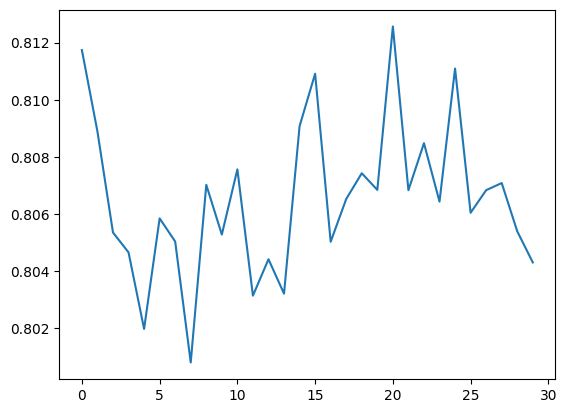

In [28]:
plt.plot(train_losses)

In [43]:
X_train.shape

torch.Size([393412, 100])

In [82]:
weights = model.state_dict()

In [83]:
weights['linear.weight'] = 0.01 * np.ones(100)

In [90]:
weights['linear.bias'] = np.array([0])

In [96]:
def set_weights(model, weights):
    for name, param in model.named_parameters():
        if name.endswith('weight') or name.endswith('bias'):
            param.data.copy_(torch.from_numpy(weights[name]))

In [97]:
print(weights)

OrderedDict([('linear.weight', array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])), ('linear.bias', array([0]))])


In [98]:
set_weights(model, weights)

In [99]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100]])), ('linear.bias', tensor([0.]))])


In [100]:
print(model(X_train))

tensor([[-0.6272],
        [-0.6265],
        [-0.6256],
        ...,
        [ 0.6069],
        [ 0.5965],
        [ 0.5852]], grad_fn=<AddmmBackward0>)


In [103]:
print(y_train)

tensor([-0.5259, -0.6325, -0.5548,  ...,  0.3600, -0.0801,  0.1922])


In [ ]:
print(mo)

In [104]:
y_pred = model(X_train)

In [109]:
print(model.custom_loss(torch.reshape(y_pred, (1, len(y_pred))), y_train))

tensor(0.1102, grad_fn=<MeanBackward0>)


In [101]:
print(y_pred_naive)


tensor([-0.6272, -0.6265, -0.6256,  ...,  0.6069,  0.5965,  0.5852])


In [60]:
weight = (model.state_dict()['linear.weight'])

In [73]:
print(torch.dot(weight[0], X_train[1]))

tensor(-0.1610)


In [65]:
print(y_train[0])

tensor(-0.5259)


In [ ]:
model.state_d

In [71]:
print(model(X_train))

tensor([[-0.4255],
        [-0.3848],
        [-0.3768],
        ...,
        [-0.0425],
        [-0.0474],
        [-0.0597]], grad_fn=<AddmmBackward0>)


In [74]:
print(y_pred_naive)

tensor([-0.6272, -0.6265, -0.6256,  ...,  0.6069,  0.5965,  0.5852])


In [75]:
print(y_train)

tensor([-0.5259, -0.6325, -0.5548,  ...,  0.3600, -0.0801,  0.1922])


In [42]:
y_pred_naive = torch.mean(X_train, axis=1)

In [43]:
print(y_train)

tensor([-0.5259, -0.6325, -0.5548,  ...,  0.3600, -0.0801,  0.1922])


In [50]:
y_pred = model(X_train)
y_pred = torch.reshape(y_pred, (1, len(y_pred)))

In [76]:
print(torch.mean(torch.square(y_train - y_pred_naive)))

tensor(0.1102)


In [51]:
print(y_train)

tensor([-0.5259, -0.6325, -0.5548,  ...,  0.3600, -0.0801,  0.1922])


In [77]:
print(torch.mean(torch.square(y_train - y_pred)))

tensor(0.8260, grad_fn=<MeanBackward0>)


In [39]:
ytorch.mean(X_test, axis=1))

tensor([0.9641, 0.9678, 0.9693,  ..., 1.1510, 1.1536, 1.1589])


In [40]:
print(y_test)

tensor([[0.8178],
        [0.6510],
        [0.6810],
        ...,
        [0.8567],
        [1.2523],
        [0.4187]])


In [41]:
print(model(X_test))

tensor([[-0.4319],
        [-0.4360],
        [-0.4563],
        ...,
        [-0.4974],
        [-0.5229],
        [-0.5361]], grad_fn=<AddmmBackward0>)


In [31]:
print(torch.mean(X_train[0]))

tensor(-0.6272)


In [48]:
print(X_test[0])

tensor([ 0.4431,  0.5039, -0.0581,  0.3666,  0.5338,  0.5195,  0.6128,  0.6724,
         0.6490,  0.1500,  0.1138,  0.0783,  0.0697, -0.2959, -0.3287, -0.2801,
        -0.1941, -0.0867,  0.0940,  0.1770,  0.2358,  0.5711,  0.4604,  0.4024,
         0.6897,  0.8702,  0.9726,  0.9850,  0.8408,  0.8025,  1.5419,  1.3170,
         1.5054,  1.7147,  1.7623,  1.3183,  1.5217,  1.7357,  1.7620,  1.9109,
         2.1560,  2.0367,  2.0160,  1.8407,  1.0691,  1.4692,  0.8995,  1.3332,
         1.5711,  1.5152,  1.5127,  1.1988,  1.6845,  1.5824,  1.5286,  1.5740,
         1.2177,  1.2005,  1.4791,  1.3948,  0.6606,  1.1867,  1.1406,  1.0428,
         0.6660,  1.0248,  0.7115,  0.6081,  0.8290,  1.1358,  1.3087,  1.1245,
         0.9293,  0.9053,  1.3654,  1.4631,  1.2502,  1.1705,  1.3348,  1.3646,
         0.9887,  1.3845,  1.6278,  1.4238,  1.1778,  0.9017,  0.8699,  0.6698,
         0.9149,  0.8501,  0.7878,  0.8671,  0.6282,  0.4052,  0.3926,  0.7766,
         0.8231,  0.8231,  0.9565,  0.97

In [30]:
print(y_test[0])

tensor([0.8178])


In [51]:
y_pred = model(X_test)

In [56]:
y_pred.shape

torch.Size([98279, 1])

In [58]:
X_test.shape

torch.Size([98279, 100])

In [55]:
print(torch.square(torch.mean(y_pred - y_test)))

RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 38634654248 bytes. Error code 12 (Cannot allocate memory)

In [46]:
y_pred = model(X_train)

In [47]:
print(y_pred[1])

tensor([-0.5178], grad_fn=<SelectBackward0>)


In [37]:
print(X_train[:5])

[array([-0.58972238, -0.72152728, -0.91991368, -0.75024159, -0.75668931])
 array([-0.72152728, -0.91991368, -0.75024159, -0.75668931, -0.82416681])
 array([-0.91991368, -0.75024159, -0.75668931, -0.82416681, -0.93610322])
 array([-0.75024159, -0.75668931, -0.82416681, -0.93610322, -0.78659916])
 array([-0.75668931, -0.82416681, -0.93610322, -0.78659916, -0.79735558])]
